# Time Series Analysis on Stock Price of Wipro Limited in $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,7


In [2]:
data=pd.read_csv('wipro.csv',index_col='Date',parse_dates=True)
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-14,5.08,5.16,5.05,5.11,5.11,2364200
2020-10-15,5.00,5.07,4.97,5.03,5.03,2269100
2020-10-16,4.98,5.03,4.98,5.01,5.01,1450500
2020-10-19,5.01,5.05,4.98,4.98,4.98,1479200
2020-10-20,5.03,5.08,5.01,5.05,5.05,1866200


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-14,5.08,5.16,5.05,5.11,5.11,2364200
2020-10-15,5.00,5.07,4.97,5.03,5.03,2269100
2020-10-16,4.98,5.03,4.98,5.01,5.01,1450500
2020-10-19,5.01,5.05,4.98,4.98,4.98,1479200
2020-10-20,5.03,5.08,5.01,5.05,5.05,1866200


In [4]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Determining Rolling Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 957 entries, 2017-01-03 to 2020-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       957 non-null    float64
 1   High       957 non-null    float64
 2   Low        957 non-null    float64
 3   Close      957 non-null    float64
 4   Adj Close  957 non-null    float64
 5   Volume     957 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 52.3 KB


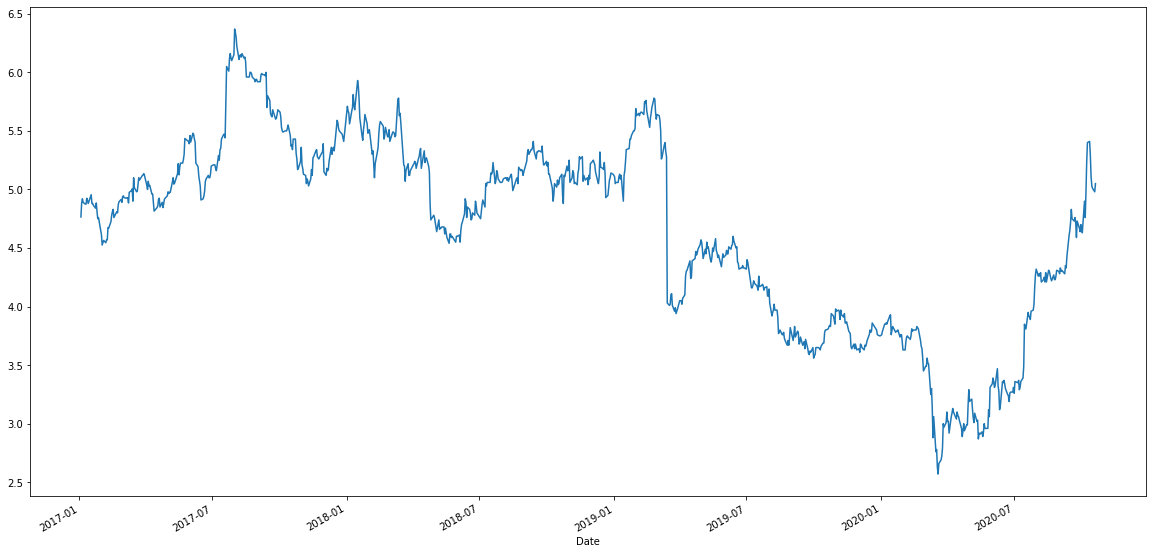

In [6]:
data['Close'].plot(figsize=(20,10))

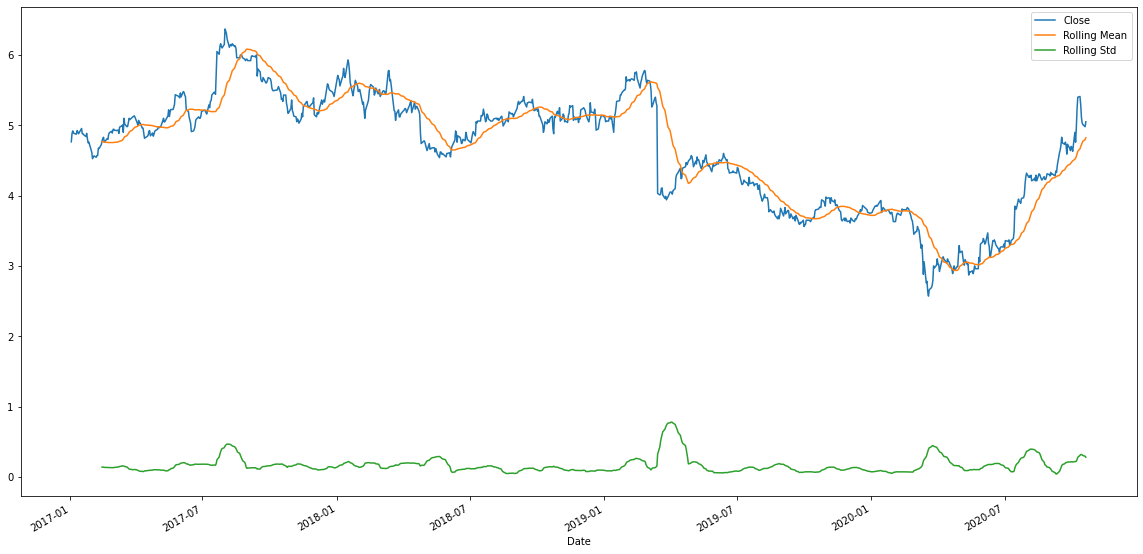

In [7]:
data['Close'].plot(figsize=(20,10))
data.rolling(window=30).mean()['Close'].plot(label='Rolling Mean')
data.rolling(window=30).std()['Close'].plot(label='Rolling Std')
plt.legend(loc='best')

In [8]:
data.columns.values

array(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype=object)

In [9]:
dataset=data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'],axis=1)

In [10]:
# Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey Fuller Test')
dftest=adfuller(dataset['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)
print('\nFrom the Dickey fuller test we got to know that dataset is Not Stationary')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Result of Dickey Fuller Test
Test Statistics                 -1.586217
P-Value                          0.490514
#Lag Used                        0.000000
Number of Observations Used    956.000000
Critical Value(1%)              -3.437209
Critical Value(5%)              -2.864568
Critical Value(10%)             -2.568382
dtype: float64

From the Dickey fuller test we got to know that dataset is Not Stationary


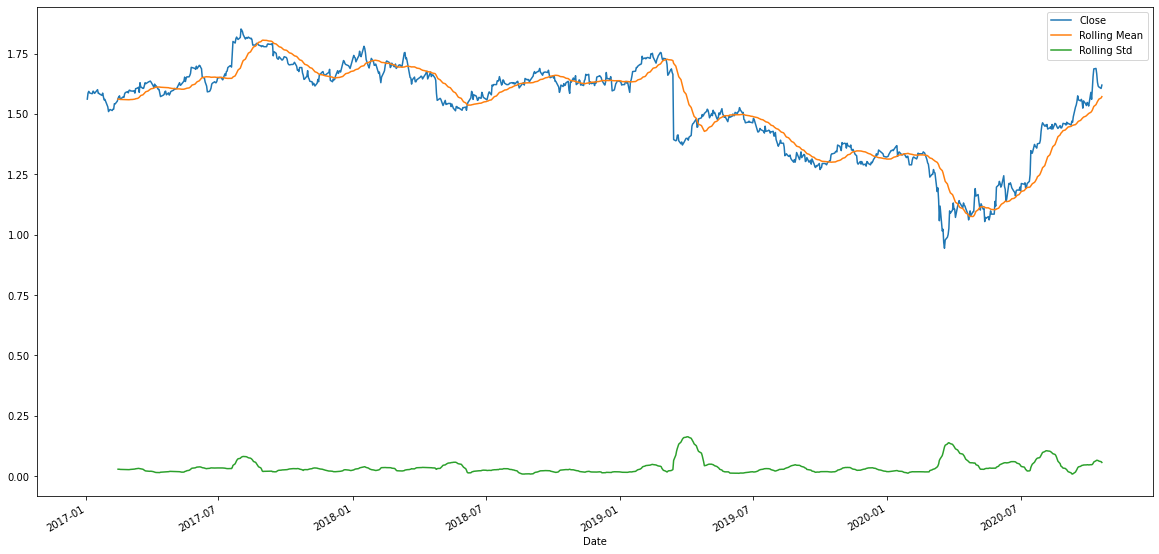

In [11]:
log_price=np.log(dataset)
log_price.plot(figsize=(20,10))
log_price.rolling(window=30).mean()['Close'].plot(label='Rolling Mean')
log_price.rolling(window=30).std()['Close'].plot(label='Rolling Std')
plt.legend(loc='best')

In [12]:
ma_log_mean=log_price.rolling(window=30).mean()
ma_log_std=log_price.rolling(window=30).std()


In [13]:
data_log_minus_ma=log_price-ma_log_mean
data_log_minus_ma.head(10)

data_log_minus_ma.dropna(inplace=True)
data_log_minus_ma.head(10)

,Close
Date,
2017-02-14,0.003345
2017-02-15,0.009289
2017-02-16,0.013815
2017-02-17,0.000319
2017-02-21,0.011318
2017-02-22,0.009754
2017-02-23,0.024266
2017-02-24,0.029590
2017-02-27,0.033599


In [14]:
# Dickey Fuller Test on new dataset
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey Fuller Test')
dftest=adfuller(data_log_minus_ma['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

Result of Dickey Fuller Test
Test Statistics                 -5.409178
P-Value                          0.000003
#Lag Used                       21.000000
Number of Observations Used    906.000000
Critical Value(1%)              -3.437588
Critical Value(5%)              -2.864735
Critical Value(10%)             -2.568471
dtype: float64


### The result we got from Augmented Dickey-Fuller test is that the data is Stationary

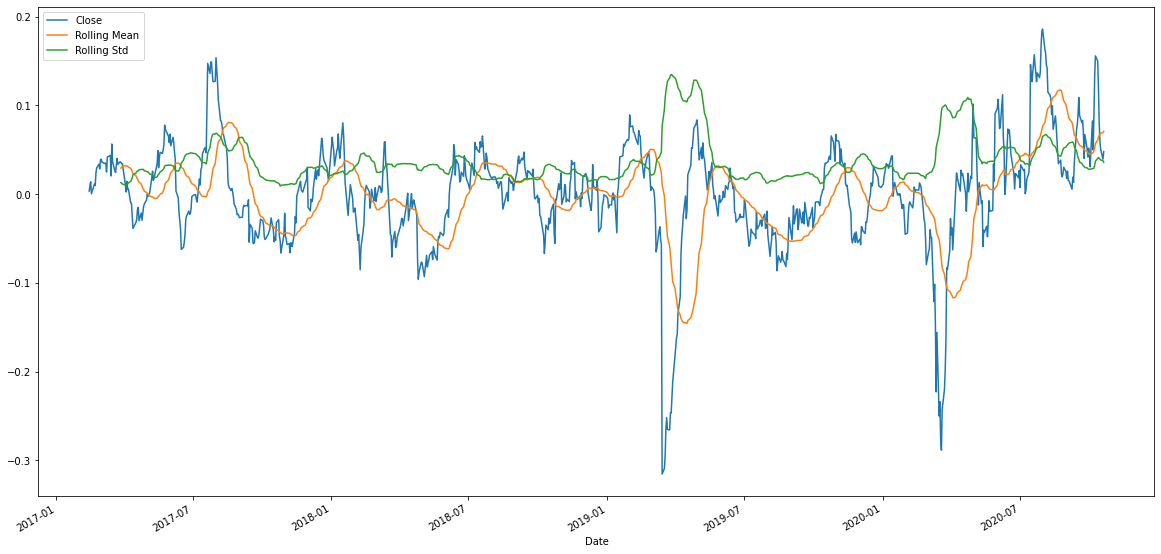

In [15]:
data_log_minus_ma.plot(figsize=(20,10))
data_log_minus_ma.rolling(window=30).mean()['Close'].plot(label='Rolling Mean')
data_log_minus_ma.rolling(window=30).std()['Close'].plot(label='Rolling Std')
plt.legend(loc='best')

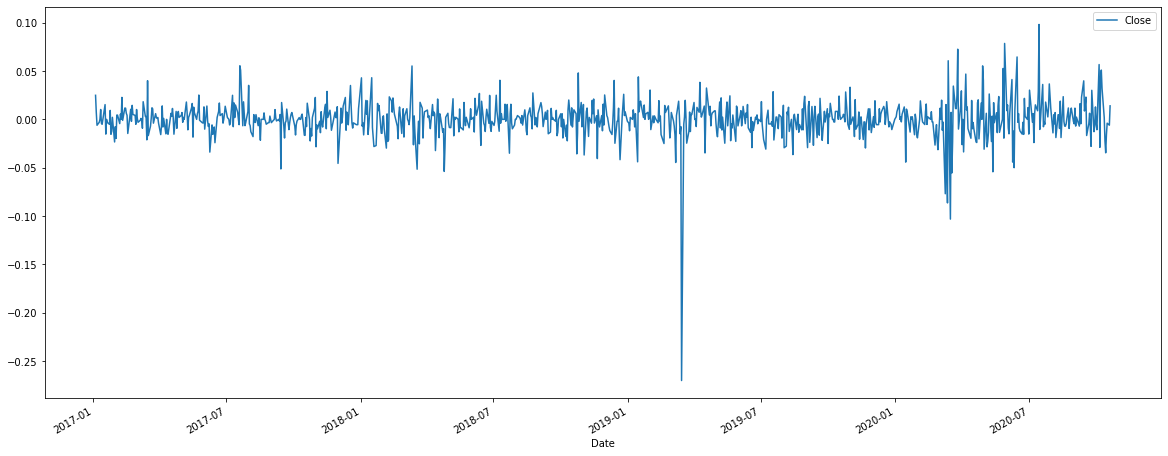

In [16]:
data_shift=log_price-log_price.shift()
data_shift.plot(figsize=(20,8))

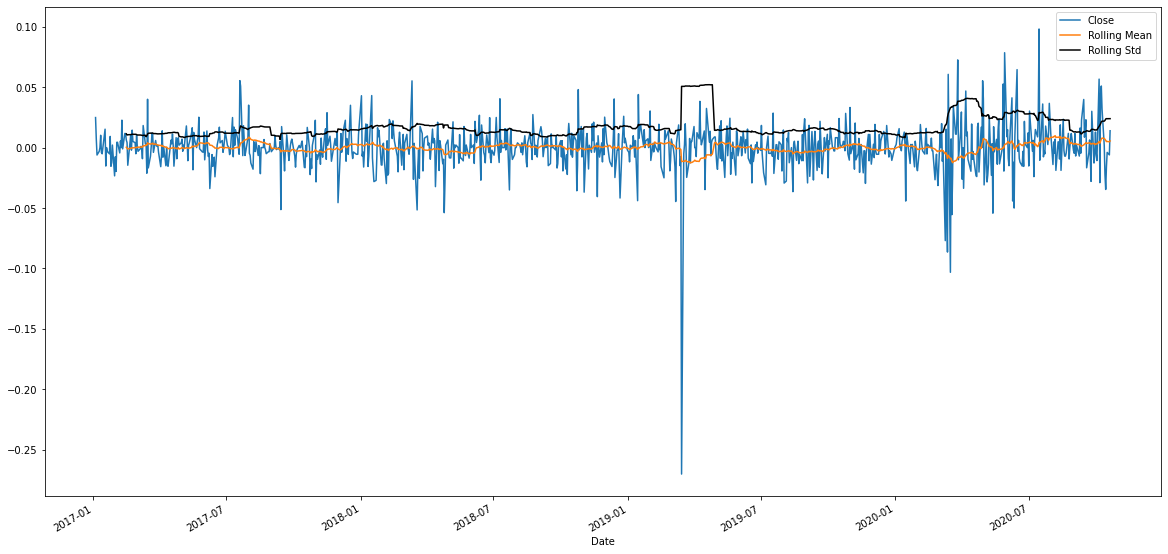

In [17]:
data_shift.dropna(inplace=True)
data_shift.plot(figsize=(20,10))
data_shift.rolling(window=30).mean()['Close'].plot(label='Rolling Mean')
data_shift.rolling(window=30).std()['Close'].plot(label='Rolling Std',color='black')
plt.legend(loc='best')

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposistion=seasonal_decompose(log_price,freq=30)
trend=decomposistion.trend
seasonal=decomposistion.seasonal
residual=decomposistion.resid

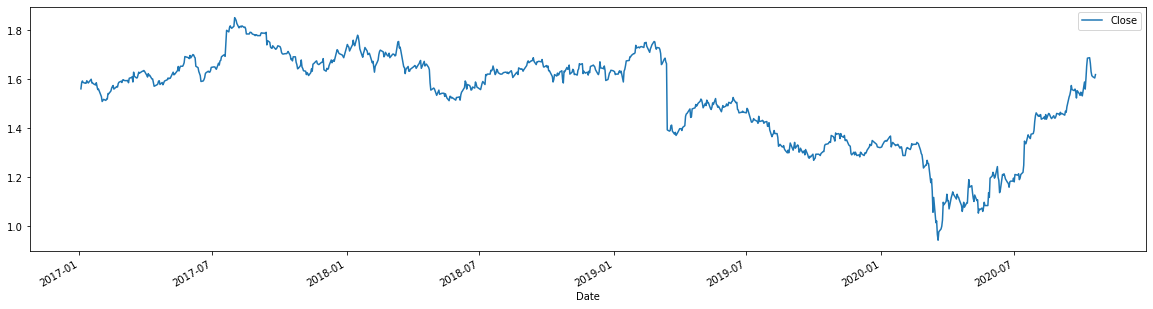

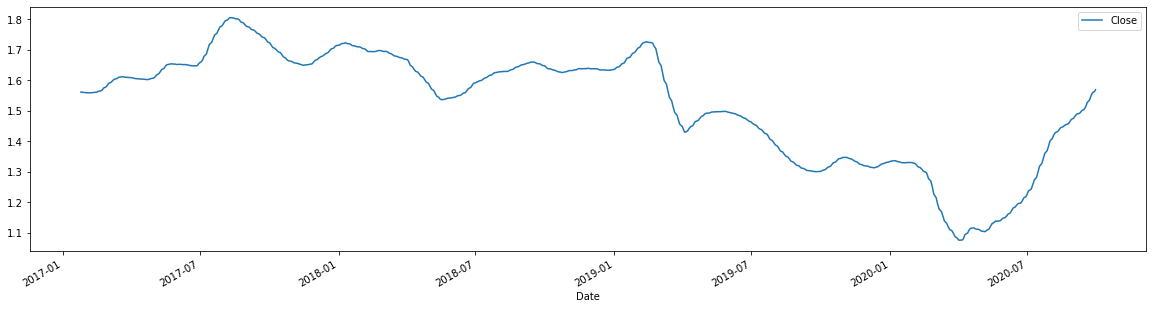

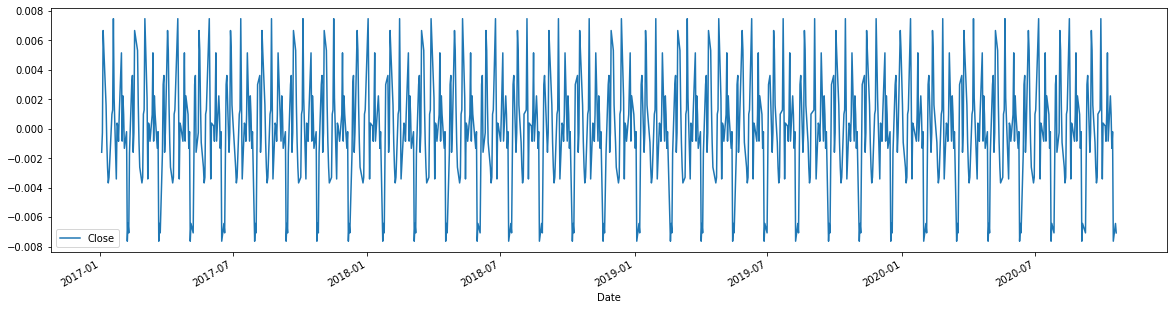

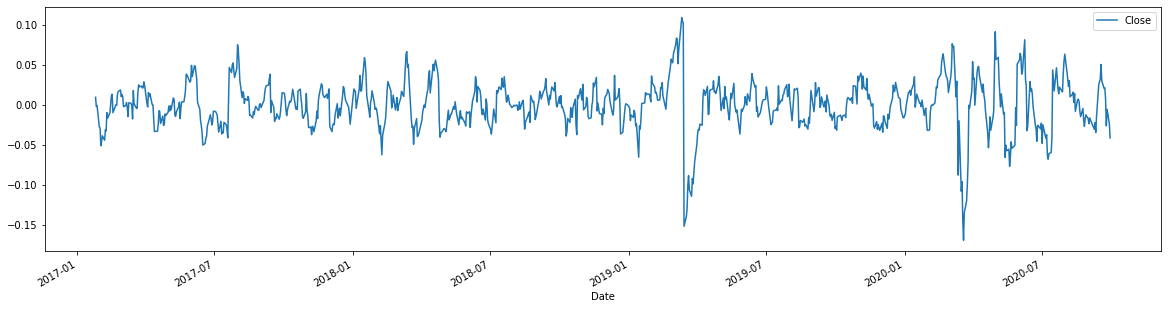

In [19]:
log_price.plot(figsize=(20,5))
trend.plot(figsize=(20,5))
seasonal.plot(figsize=(20,5))
residual.plot(figsize=(20,5))
plt.show()

Plotting AR


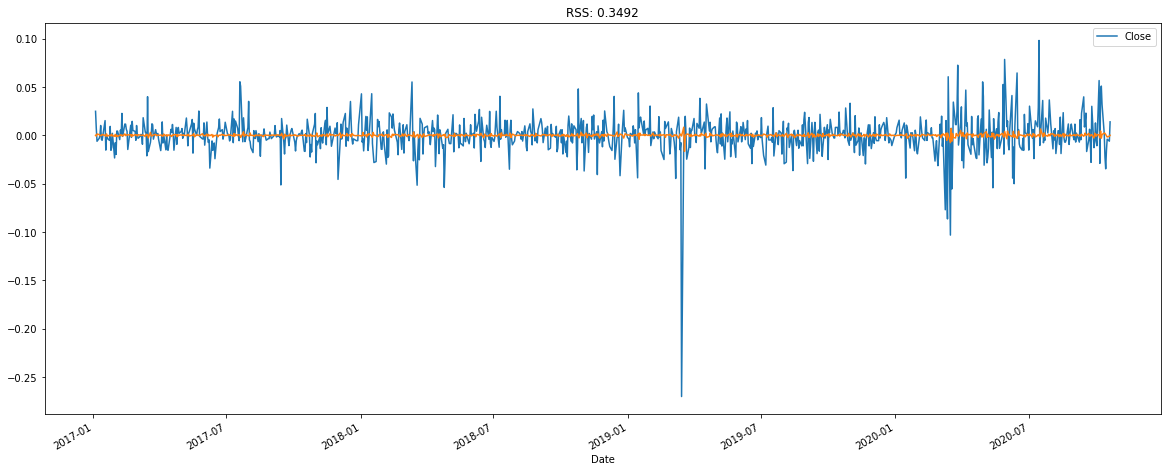

In [31]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(log_price,order=(0,1,2))
model_ar=model.fit()
data_shift.plot(figsize=(20,8))
model_ar.fittedvalues.plot(figsize=(20,8))
plt.title('RSS: %.4f'%sum((model_ar.fittedvalues-data_shift['Close'])**2))
print('Plotting AR')


In [32]:
predictions=pd.Series(model_ar.fittedvalues,copy=True)
print(predictions.head())

Date
2017-01-04    0.000062
2017-01-05   -0.000806
2017-01-06    0.001366
2017-01-09    0.000812
2017-01-10   -0.000284
dtype: float64


In [33]:
pred_cumsum=predictions.cumsum()
print(pred_cumsum.head())

Date
2017-01-04    0.000062
2017-01-05   -0.000744
2017-01-06    0.000622
2017-01-09    0.001434
2017-01-10    0.001150
dtype: float64


In [34]:
pred_arima_log=pd.Series(log_price['Close'],index=log_price.index)
pred_arima_log=pred_arima_log.add(pred_cumsum,fill_value=0)
pred_arima_log.head()

Date
2017-01-03    1.561298
2017-01-04    1.586231
2017-01-05    1.592564
2017-01-06    1.587815
2017-01-09    1.585554
dtype: float64

Text(0.5, 1.0, 'Predictions vs Target')

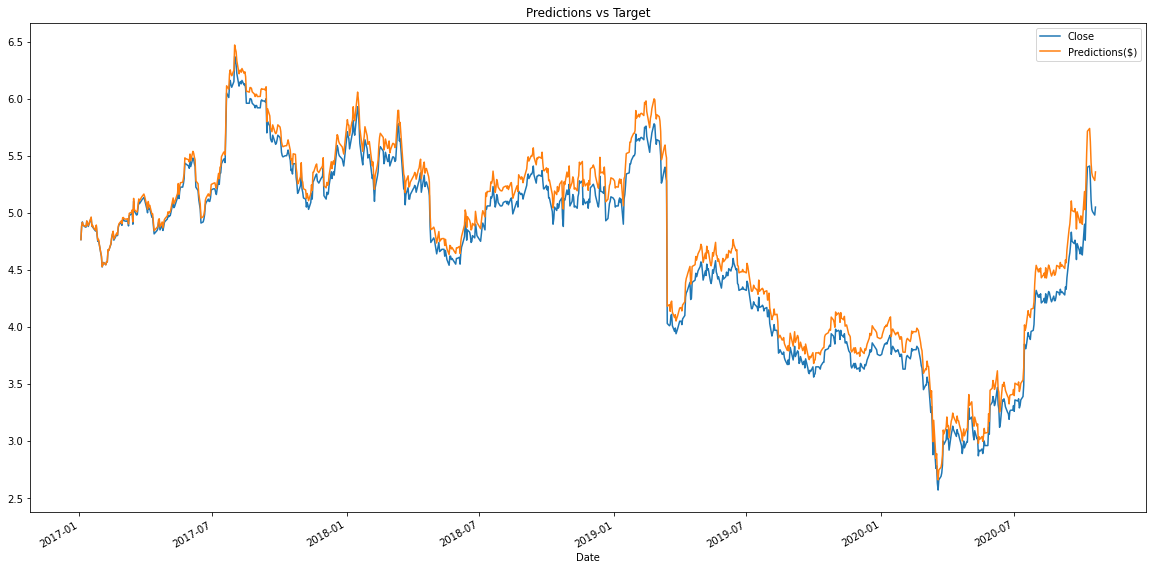

In [38]:
pred_arima=np.exp(pred_arima_log)
dataset.plot(figsize=(20,10),label='Close price($)')
pred_arima.plot(figsize=(20,10),label='Predictions($)')
plt.legend(loc='best')
plt.title('Predictions vs Target')

In [36]:
log_price.shape

(957, 1)

Prediction for future 2 years

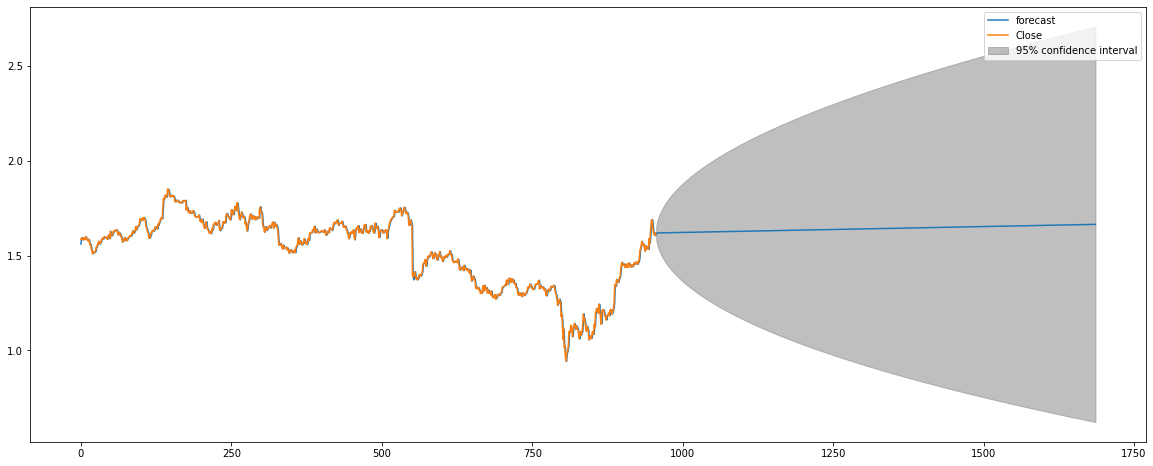

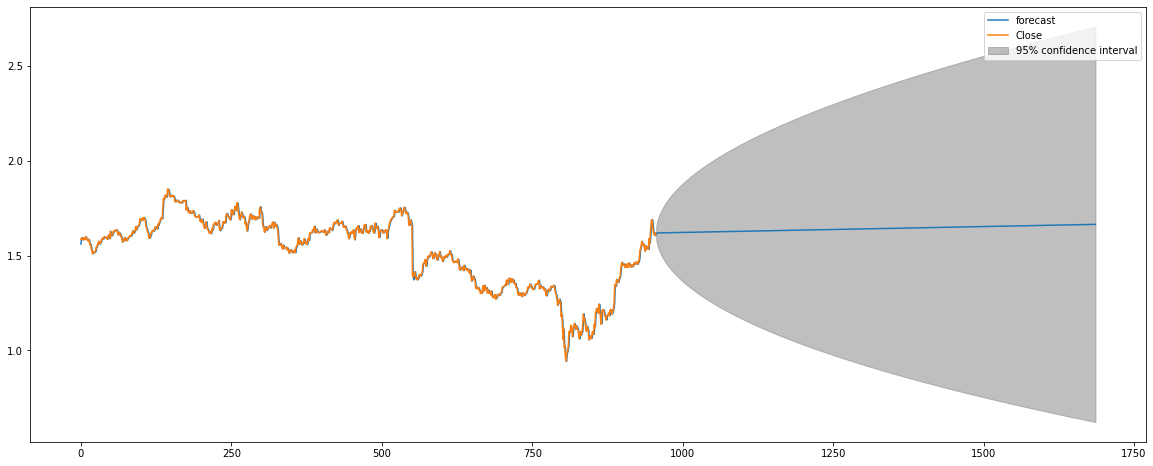

In [43]:
fig,ax=plt.subplots(figsize=(20,8))
model_ar.plot_predict(1,1687,ax=ax)
